In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### UsedCarPrice_Prediction

#### Life Cycle of a Machine Learning Project

##### 1: Understanding the Problem Statement
##### 2: Data Collection
##### 3: EDA (Exploratory Data Analysis)
##### 4: Data Cleaning
##### 5: Data Pre-Processing
##### 6: Model Training
##### 7: Choose Best Model

In [8]:
df=pd.read_csv('cardekho_dataset.csv')

#### A) Problem Statement
#### 1: The dataset comprises used cars sold on cardekho.com in India as well as important features of these cars.
#### 2: If user can predict the price of the car based on input features.
#### 3: Prediction results can be used to give new seller the price suggestion based on market condition.

In [9]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [10]:
df.shape

(15411, 14)

#### ->The data consists of 13 columns and 15411 rows.

In [12]:
df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [14]:
df.drop('Unnamed: 0',axis=1,inplace=True)


KeyError: "['Unnamed: 0'] not found in axis"

#### Delete Columns Unnamed:0 which is like the index columns and again show Top 5 Rows

In [15]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [16]:
df.tail()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
15410,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


#### checking for  Bottom 5 Rows

#### Check Null Value Counts and DataTypes of the features

In [18]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

#### so NO Null Values in the Dataset

In [21]:
df.duplicated().sum()

167

### Section B Report
#####  1: There are 15411 rows and 12 columns in the dataset.
#####  2: There are no null values in the dataset.
##### 3: Out of 12 features 6 are numeric features (vehicle_age,km_driven,mileage engine,max_power,seats,selling_price) and rest are categorical features
##### 4: There are 167 duplicate values in total in the dataset.

### ---------------------

### Now will Explore the data 

##### lets check for categorical features in the Datasets

In [39]:
categorical_features=[i for i in df.columns if df[i].dtypes == 'object']
print(categorical_features)
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(numerical_features)


print(f"We have {len(categorical_features)} numerical_features")
print(f"We have {len(categorical_features)} categorical_features")

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']
['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
We have 6 numerical_features
We have 6 categorical_features


#### Feature Information
##### 1: car_name: Car's Full name, which includes brand and specific model name.
##### 2: brand: Brand Name of the particular car.
##### 3: model: Exact model name of the car of a particular brand.
##### 4: seller_type: Which Type of seller is selling the used car
##### 5: fuel_type: Fuel used in the used car, which was put up on sale.
##### 6: transmission_type: Transmission used in the used car, which was put on sale.
##### 7: vehicle_age: The count of years since car was bought.
##### 8: mileage: It is the number of kilometer the car runs per litre.
##### 9: engine: It is the engine capacity in cc(cubic centimeters)
##### 10: max_power: Max power it produces in BHP.
##### 11: seats: Total number of seats in car.
##### 12: selling_price: The sale price which was put up on website

In [35]:
print("Categories in 'seller_type' variable: ",end = " ")
print(df['seller_type'].unique())
print("\n")

print("Categories in 'fuel_type' variable: ",end = " ")
print(df['fuel_type'].unique())
print("\n")

print("Categories in 'transmission_type' variable: ",end = " ")
print(df['transmission_type'].unique())
print("\n")

print("Categories in 'seats' variable: ",end = " ")
print(df['seats'].unique())

Categories in 'seller_type' variable:  ['Individual' 'Dealer' 'Trustmark Dealer']


Categories in 'fuel_type' variable:  ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


Categories in 'transmission_type' variable:  ['Manual' 'Automatic']


Categories in 'seats' variable:  [5 8 7 6 4 2 9 0]


##### In the seats features, thers is variable with 0, 0 seats with cars are not possible atleat one seat is needed, so drop the rows that seats with zero

### D) Univariate Analysis
##### Taking one avriable at a time and analyzing it.
##### Eg:- PDF,CDF,boxplot etc.

### Numerical Features

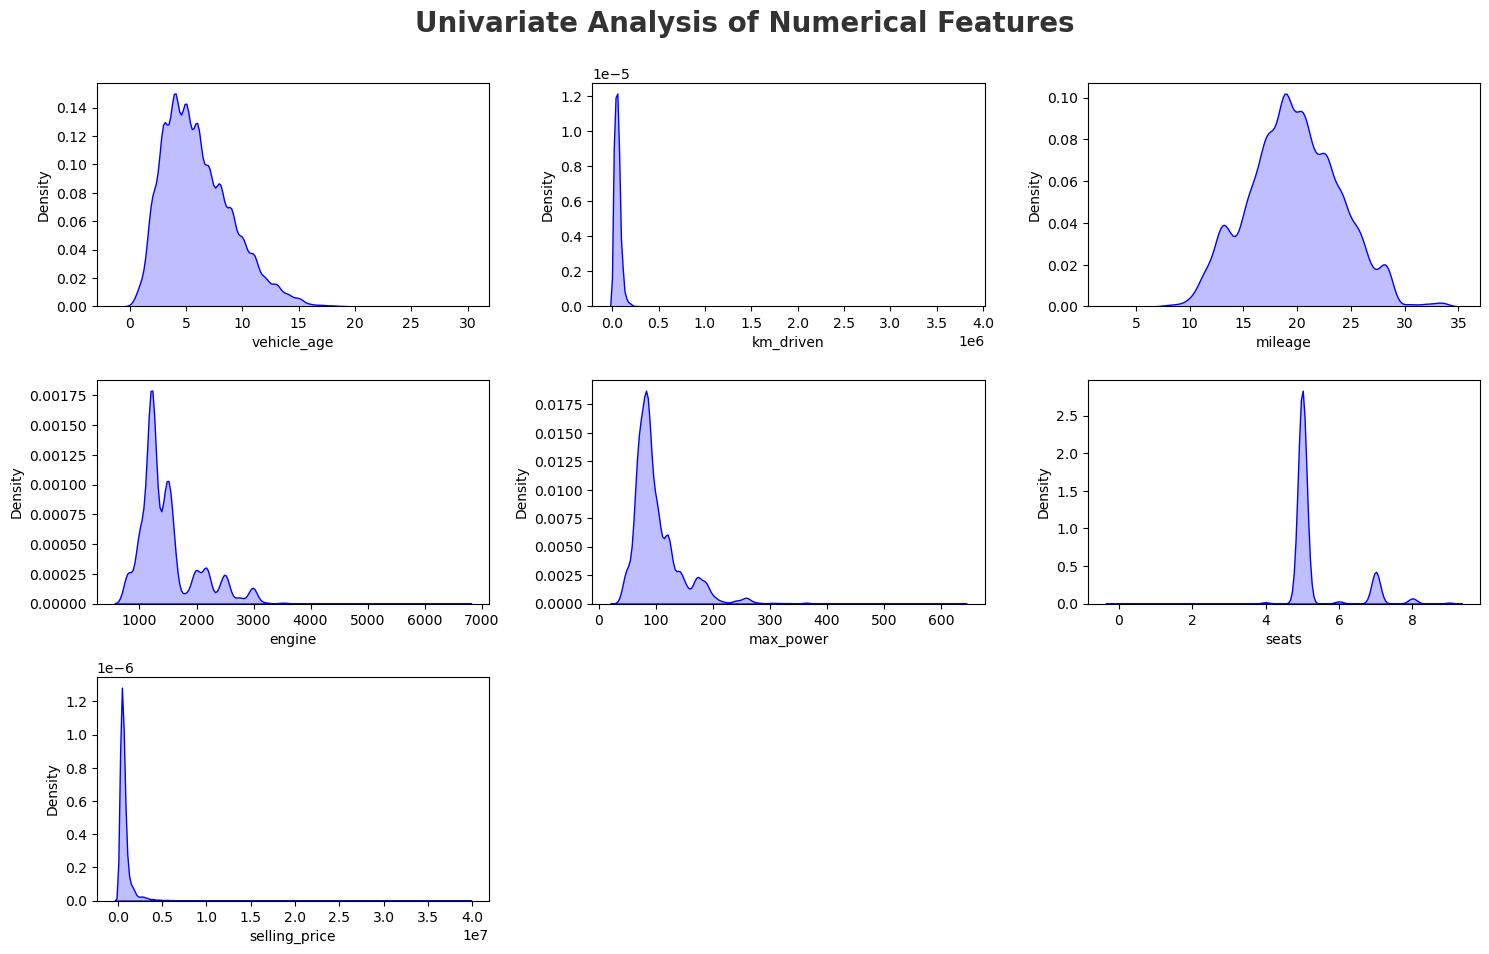

In [41]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Features",fontsize=20,fontweight='bold',alpha=0.8,y=1.)
for i in range(len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True,color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [36]:
df[df['seats'] == 0]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
3217,Honda City,Honda,City,18,40000,Individual,Petrol,Manual,13.00,1493,100.00,0,115000
12619,Nissan Kicks,Nissan,Kicks,2,10000,Individual,Diesel,Manual,19.39,1461,108.49,0,1154000


### Report
#### 1: Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.
#### 2: Outliers in km_driven, enginer, selling_price, and max power.

<Axes: title={'center': 'selling_price'}, xlabel='seats'>

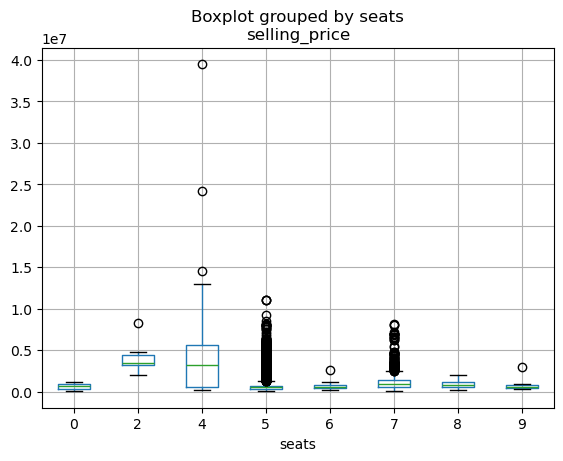

In [42]:
df.boxplot(by="seats",column=['selling_price'])

<Axes: >

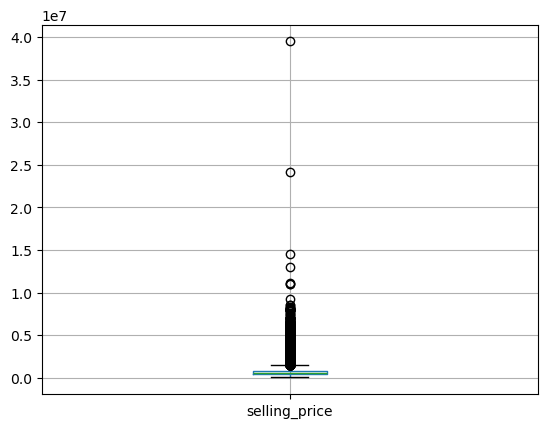

In [43]:
df.boxplot(column=['selling_price'])

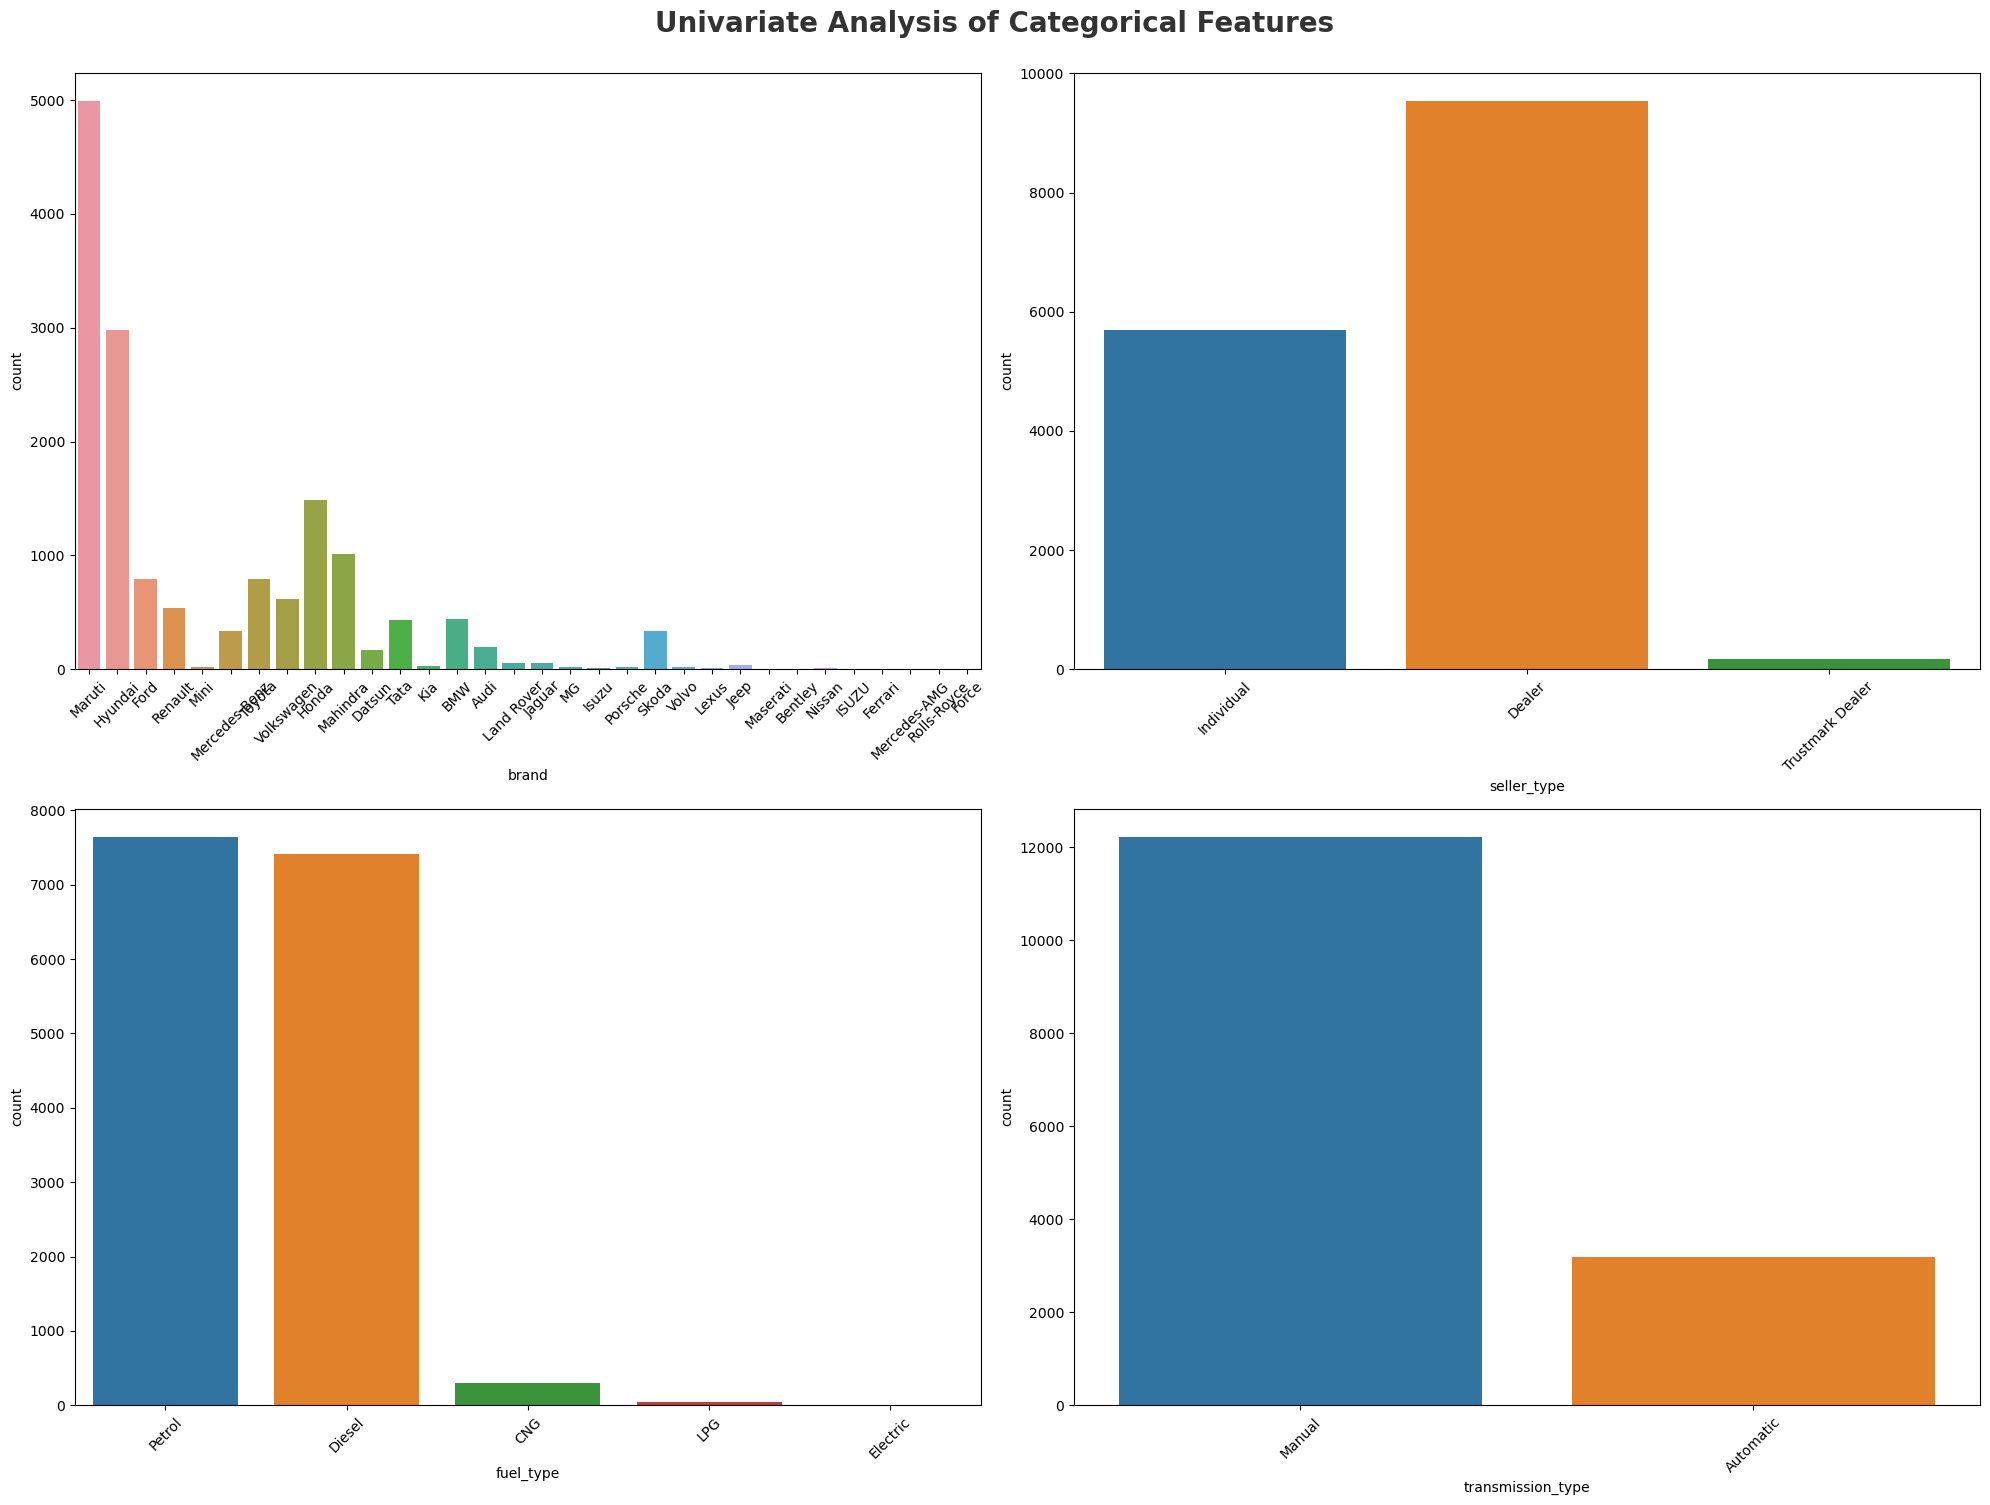

In [46]:
import warnings
warnings.filterwarnings('ignore')

##categorical features
plt.figure(figsize=(20,15))
plt.suptitle("Univariate Analysis of Categorical Features",fontsize=20,fontweight='bold',alpha=0.8,y=1)
cat1 = ['brand','seller_type','fuel_type','transmission_type']

for i in range(len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### E) Multivariate Analysis
##### Multivariate Analysis is the analysis of more than one variable.

##### Check Multicollinearity of Numerical Features

In [48]:
df[numeric_features].corr()


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


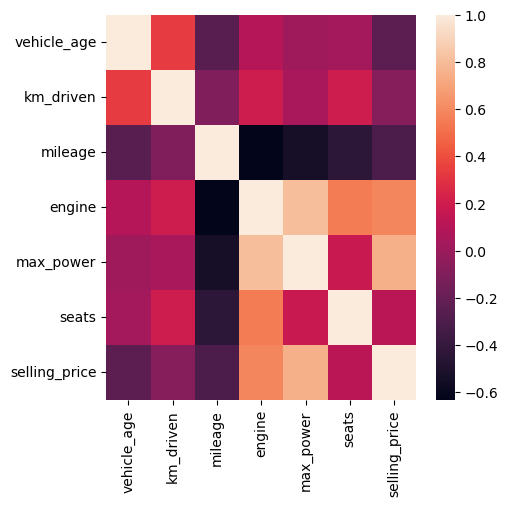

In [54]:
plt.figure(figsize = (5,5))
sns.heatmap(df[numeric_features].corr())
plt.show()


### Report
##### 1: Selling Price has Negative correlation with vehicle_age, km_driven, and mileage. i.e. If vehicle_age, km_driven, mileage increase then selling_price of the car decreases.
##### 2: Selling_price has positive correlation with engine and max_power. It has a very weak postive correlation with seats.

### Check Multicollinearity for Categorical Features
##### The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

##### Here we test correlation of Categorical columns with Target column i.e Selling Price

In [55]:
from scipy.stats import chi2_contingency
dataset_table = pd.crosstab(df['selling_price'],df['brand'])
dataset_table.head()

brand,Audi,BMW,Bentley,Datsun,Ferrari,Force,Ford,Honda,Hyundai,ISUZU,...,Mini,Nissan,Porsche,Renault,Rolls-Royce,Skoda,Tata,Toyota,Volkswagen,Volvo
selling_price,,,,,,,,,,,,,,,,,,,,,
40000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50000,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
55000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60000,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
chi2_contingency(dataset_table)

Chi2ContingencyResult(statistic=125264.56097651123, pvalue=0.0, dof=33635, expected_freq=array([[0.01245863, 0.02848615, 0.00019467, ..., 0.05145675, 0.040231  ,
        0.00129777],
       [0.01245863, 0.02848615, 0.00019467, ..., 0.05145675, 0.040231  ,
        0.00129777],
       [0.0373759 , 0.08545844, 0.000584  , ..., 0.15437026, 0.12069301,
        0.00389332],
       ...,
       [0.01245863, 0.02848615, 0.00019467, ..., 0.05145675, 0.040231  ,
        0.00129777],
       [0.01245863, 0.02848615, 0.00019467, ..., 0.05145675, 0.040231  ,
        0.00129777],
       [0.01245863, 0.02848615, 0.00019467, ..., 0.05145675, 0.040231  ,
        0.00129777]]))

In [57]:
p_value = chi2_contingency(pd.crosstab(df['selling_price'], df['brand']))[1]
p_value

0.0

In [58]:
#### applying chi-square test for all categorical variables
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    ##if p_value<0.05
    if chi2_contingency(pd.crosstab(df['selling_price'],df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")
result = pd.DataFrame(data=[categorical_features,chi2_test]).T
result.columns = ['Features','Hypothesis Result']
result

,Features,Hypothesis Result
0,car_name,Reject Null Hypothesis
1,brand,Reject Null Hypothesis
2,model,Reject Null Hypothesis
3,seller_type,Reject Null Hypothesis
4,fuel_type,Reject Null Hypothesis
5,transmission_type,Reject Null Hypothesis


In [59]:
continuous_features = []
for feature in numeric_features:
    if len(df[feature].unique()) >= 10:
        continuous_features.append(feature)
        
continuous_features

['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']

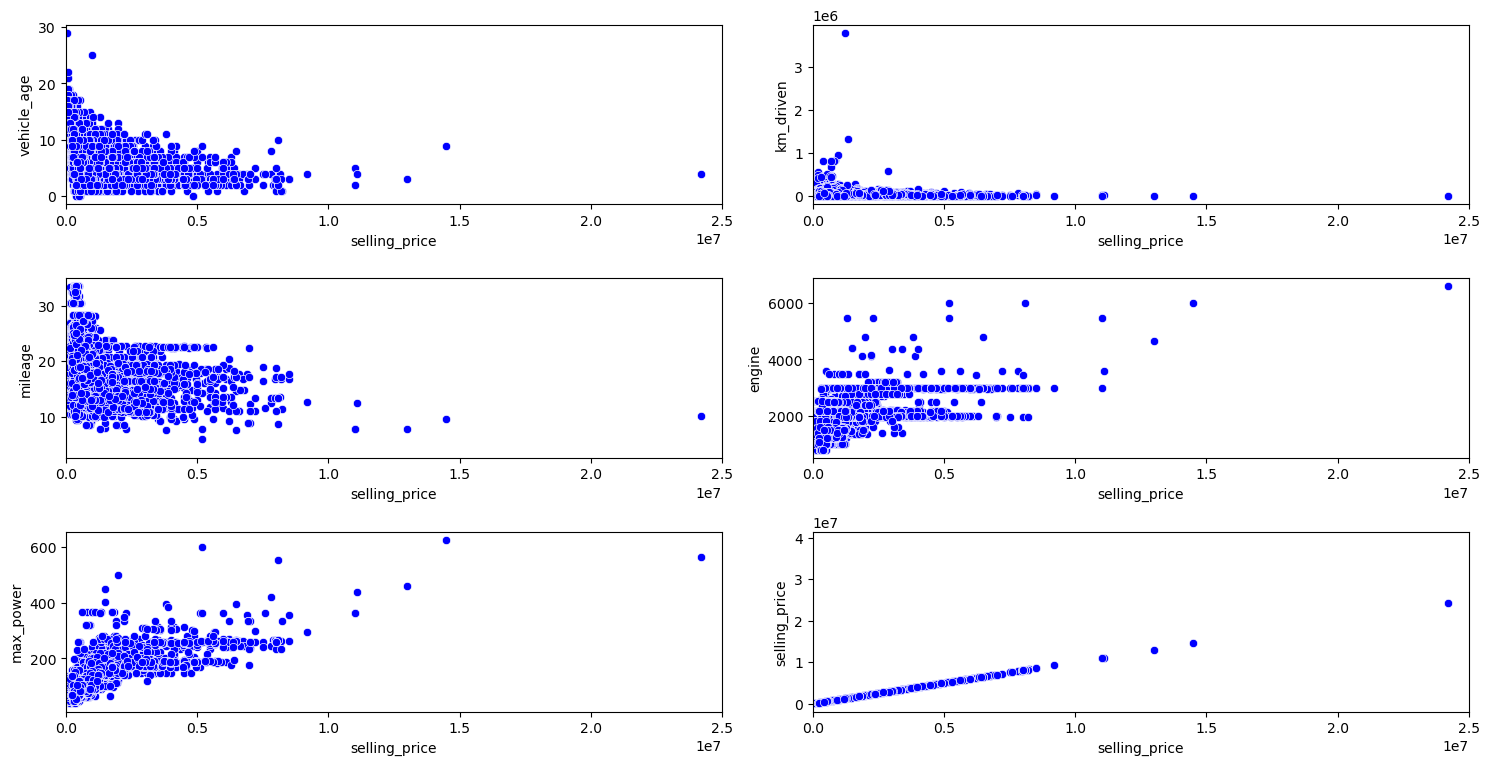

In [60]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='selling_price', y=continuous_features[i], color='b')
    plt.xlim(0,25000000) # Limit to 2.5 cr Rupees to view clean
    plt.tight_layout()


### Report
##### Lower Vehicle age has more selling price than Vehicle with more age.
##### Engine CC has positive effect on price.
##### Kms Driven has negative effect on selling price.

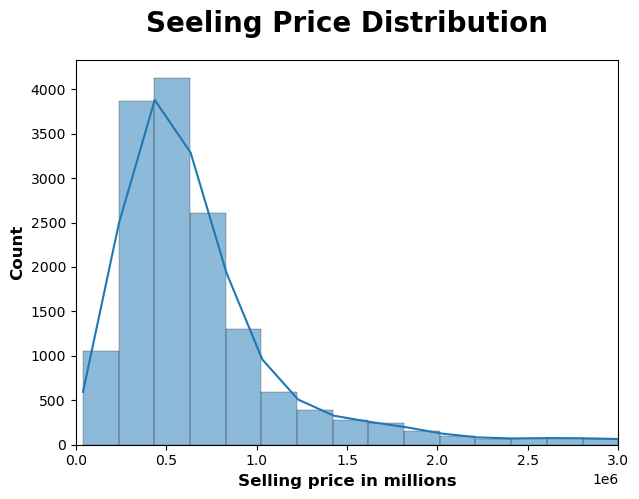

In [65]:
plt.subplots(figsize=(7,5))
sns.histplot(df.selling_price,bins=200,kde=True)
plt.title("Seeling Price Distribution", weight='bold', fontsize=20, pad=20)
plt.ylabel("Count",weight='bold',fontsize=12)
plt.xlabel("Selling price in millions", weight='bold', fontsize=12)
plt.xlim(0,3000000)
plt.show()

In [66]:
### Top 10 most selling cars
df.car_name.value_counts()[0:10]

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

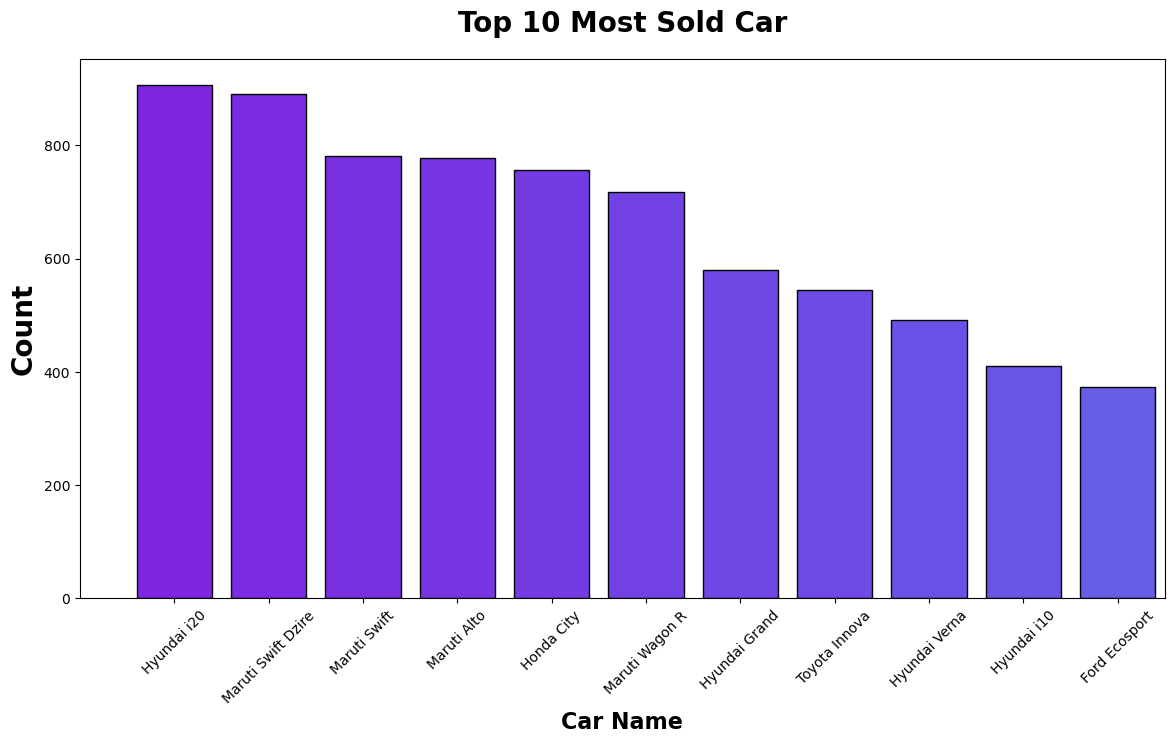

In [67]:
plt.subplots(figsize = (14,7))
sns.countplot(x="car_name",data=df,ec='black',palette="rainbow",order=df['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

##### Check mean price of Hyundai i20 which is most sold

In [68]:
i20 = df[df['car_name'] == 'Hyundai i20']['selling_price'].mean()
print(f'The mean price of Hyundai i20 is {i20:.2f} Rupees')

The mean price of Hyundai i20 is 543603.75 Rupees


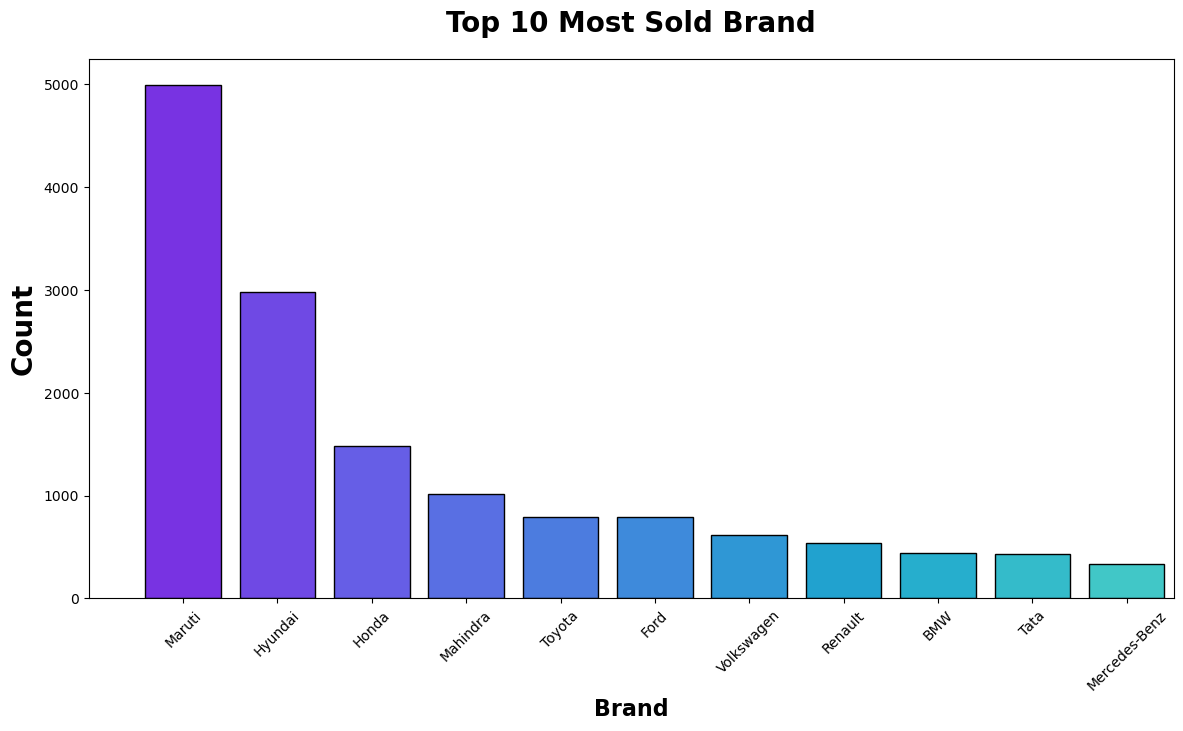

In [71]:
plt.subplots(figsize = (14,7))
sns.countplot(x="brand",data=df,ec='black',palette="rainbow",order=df['brand'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

##### Check the Mean price of Maruti brand which is most sold

In [72]:
maruti = df[df['brand'] == 'Maruti']['selling_price'].mean()
print(f"The mean price of Maruti is {maruti:.2f} Rs")

The mean price of Maruti is 487089.32 Rs



#### Report
##### 1: AS per the chart, Maruti has the most share of Ads in Used Cars website and Maruti is the most sold brand.
##### 2: Following Maruti we have Hyundai and Honda
##### 3: Mean Price of Maruti Brand Cars is 4.87 Lakhs

### Costliest Brand and Costliest Car

In [73]:
df.groupby('brand').selling_price.max()

brand
Audi              6800000
BMW               8500000
Bentley          14500000
Datsun             650000
Ferrari          39500000
Force              700000
Ford              3200000
Honda             3200000
Hyundai           2600000
ISUZU             1900000
Isuzu             2300000
Jaguar            6300000
Jeep              5600000
Kia               3525000
Land Rover        9200000
Lexus             8000000
MG                2075000
Mahindra          2950000
Maruti            1225000
Maserati          6200000
Mercedes-AMG      5100000
Mercedes-Benz    13000000
Mini              3875000
Nissan            1450000
Porsche          11100000
Renault           1155000
Rolls-Royce      24200000
Skoda             3550000
Tata              1750000
Toyota            3650000
Volkswagen        1250000
Volvo             8195000
Name: selling_price, dtype: int64

In [74]:
brand = df.groupby('brand').selling_price.max()
brand_df = brand.to_frame().sort_values('selling_price',ascending=False)[0:10]
brand_df

,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


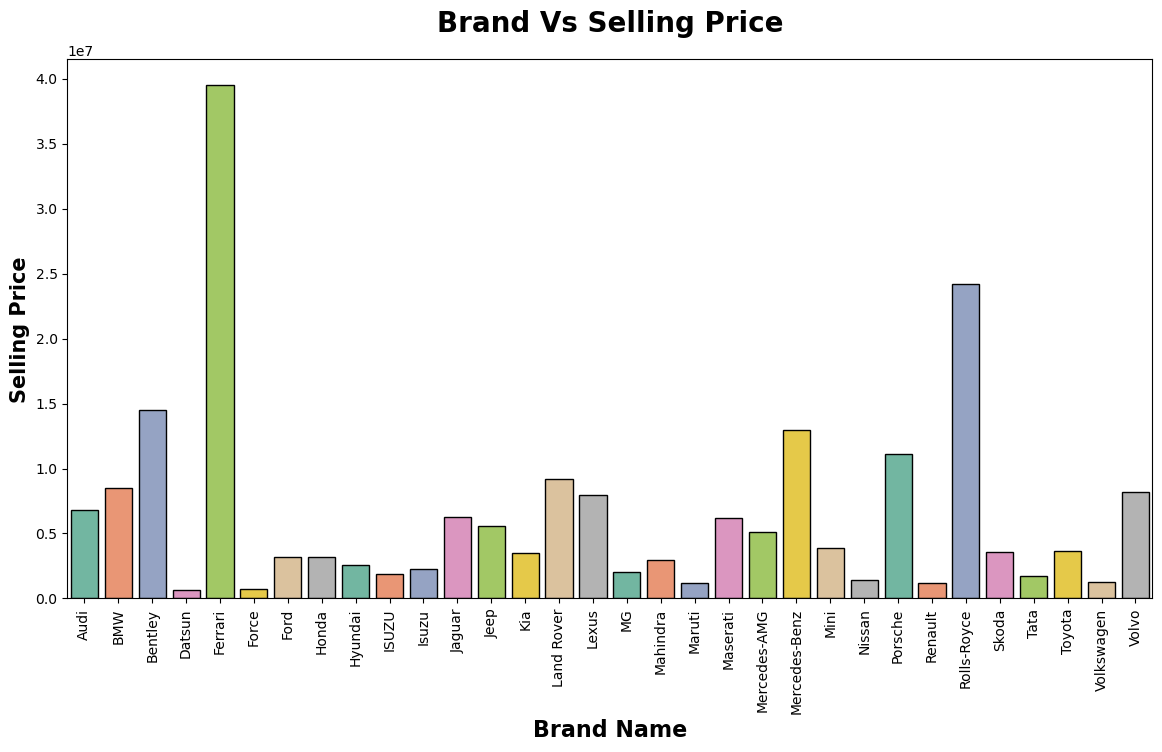

In [75]:
plt.subplots(figsize = (14,7))
sns.barplot(x=brand.index,y=brand.values,ec='black',palette='Set2')
plt.title("Brand Vs Selling Price", weight="bold", fontsize=20, pad=20)
plt.ylabel("Selling Price", weight='bold', fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

### Costliest Car

In [76]:
car = df.groupby('car_name').selling_price.max()
car = car.to_frame().sort_values('selling_price',ascending=False)[0:10]
car

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


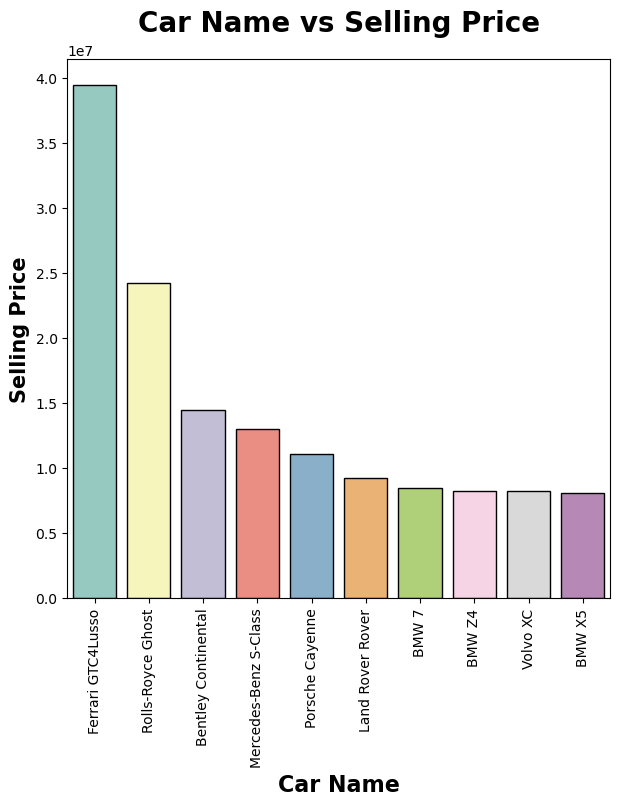

In [78]:
plt.subplots(figsize=(7,7))
sns.barplot(x=car.index,y=car.selling_price,ec='black',palette='Set3')
plt.title("Car Name vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

### Report
##### 1: Costliest Car sold is Ferrari GTC4 Lusso followed by Rolls Royce Ghost.
##### 2: Ferrari selling price is 3.95 Crs.
##### 3: Other than Ferrari other car has priced below 1.5cr.

### Most Mileage Brand and Car Name

In [79]:
mileage = df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)
mileage.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


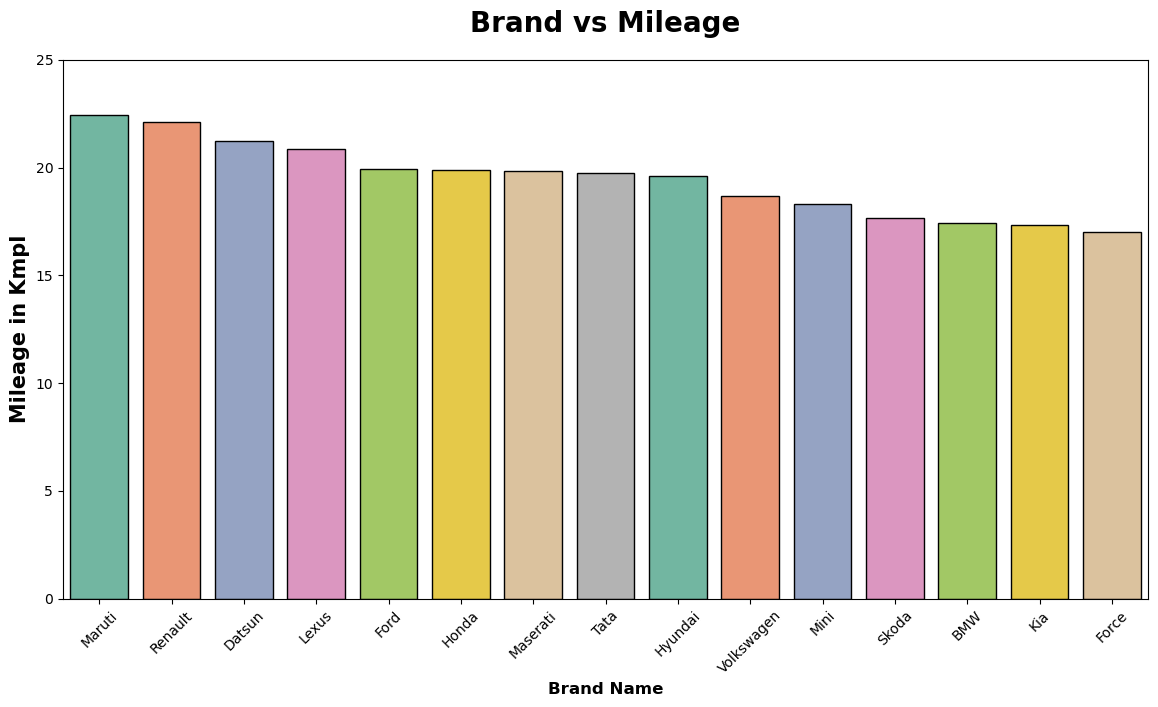

In [80]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index, y=mileage.values, ec = "black", palette="Set2")
plt.title("Brand vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=12)
plt.ylim(0,25)
plt.xticks(rotation=45)
plt.show()

### Car with Highest Mileage

In [81]:
mileage_C= df.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)
mileage_C.to_frame()

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


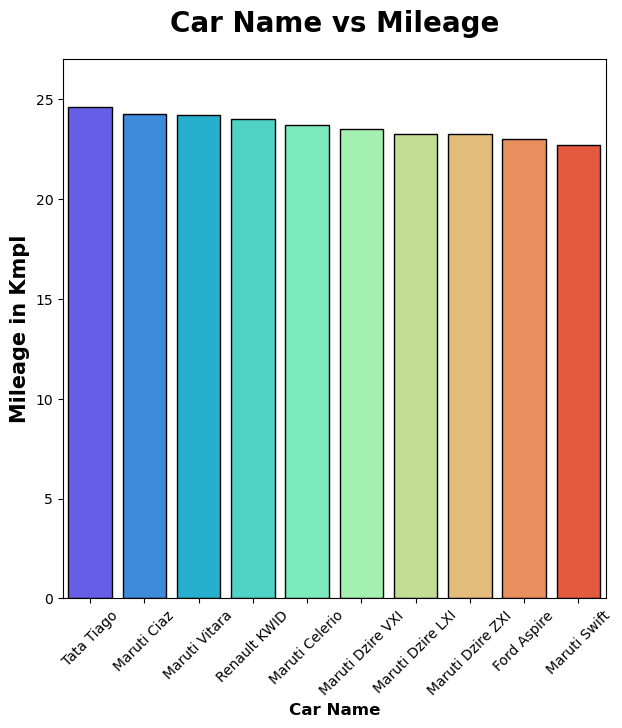

In [83]:
plt.subplots(figsize=(7,7))
sns.barplot(x=mileage_C.index, y=mileage_C.values, ec = "black", palette="rainbow")
plt.title("Car Name vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=12)
plt.ylim(0,27)
plt.xticks(rotation=45)
plt.show()

### Kilometer driven vs Selling Pric

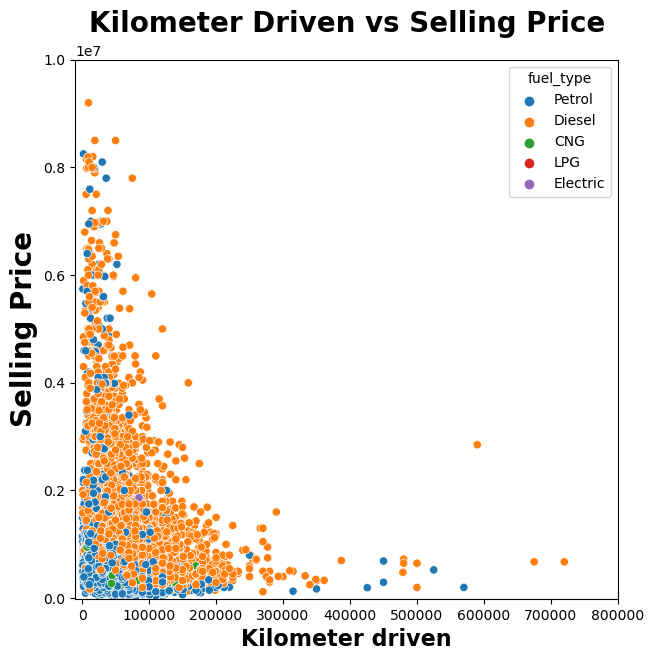

In [87]:
plt.subplots(figsize=(7,7))
sns.scatterplot(x="km_driven", y='selling_price', data=df,color='b', hue='fuel_type')
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,800000) #used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()

### Report
##### Many Cars were sold with kms between 0 to 20k Kilometers
##### Low Kms driven cars had more selling price compared to cars which had more kms driven.

### Fuel Type Vs Selling Price

In [89]:
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


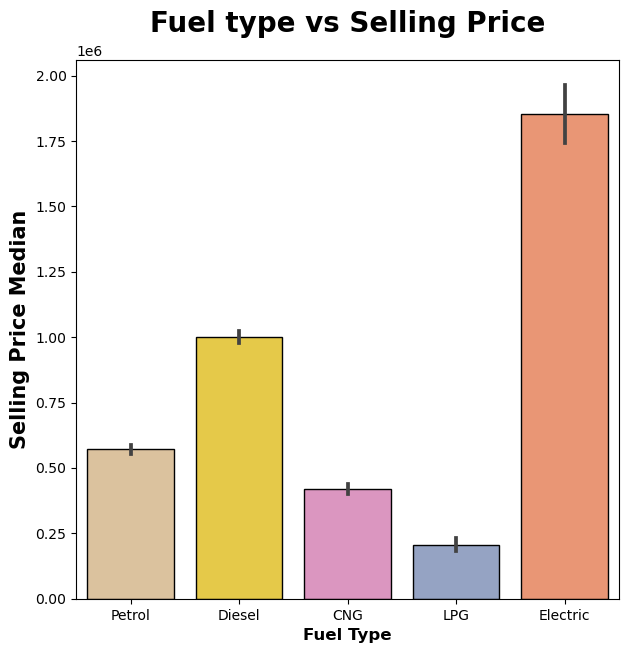

In [91]:
plt.subplots(figsize=(7,7))
sns.barplot(x=df.fuel_type, y=df.selling_price, ec = "black", palette="Set2_r")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price Median", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

### Report
##### 1: Electric cars have highers selling average price.
##### 2: Followed by Diesel and Petrol.
##### 3: Fuel Type is also important feature for the Target variable.

### Most sold Fuel type

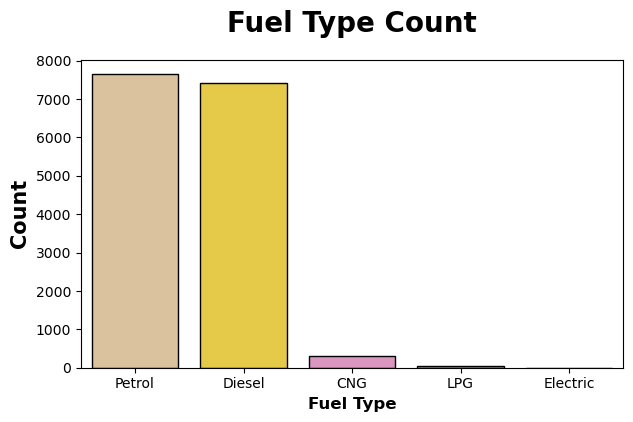

In [96]:
plt.subplots(figsize=(7,4))
sns.countplot(x=df.fuel_type, ec = "black", palette="Set2_r")
plt.title("Fuel Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

### Report
##### Petrol and Diesel dominate the used car market in the website.
##### The most sold fuel type Vechicle is Petrol.
##### Followed by diesel and CNG and least sold is Electric

### Fuel types available and mileage given

In [97]:
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


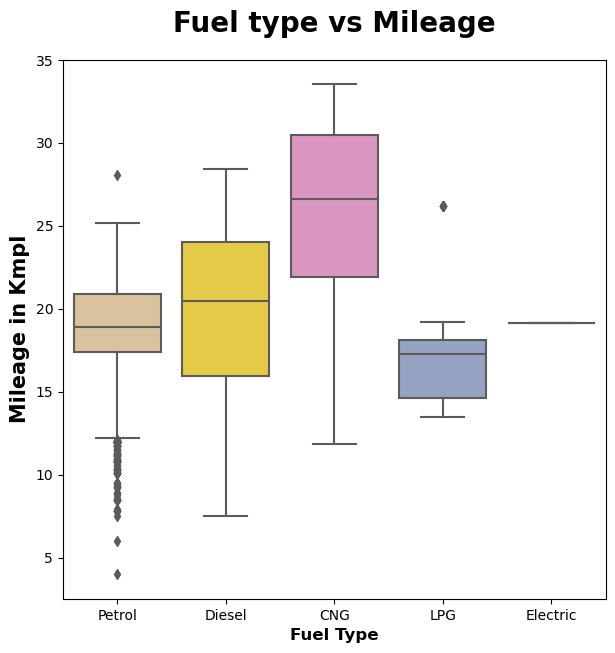

In [99]:
plt.subplots(figsize=(7,7))
sns.boxplot(x='fuel_type', y='mileage', data=df,palette="Set2_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

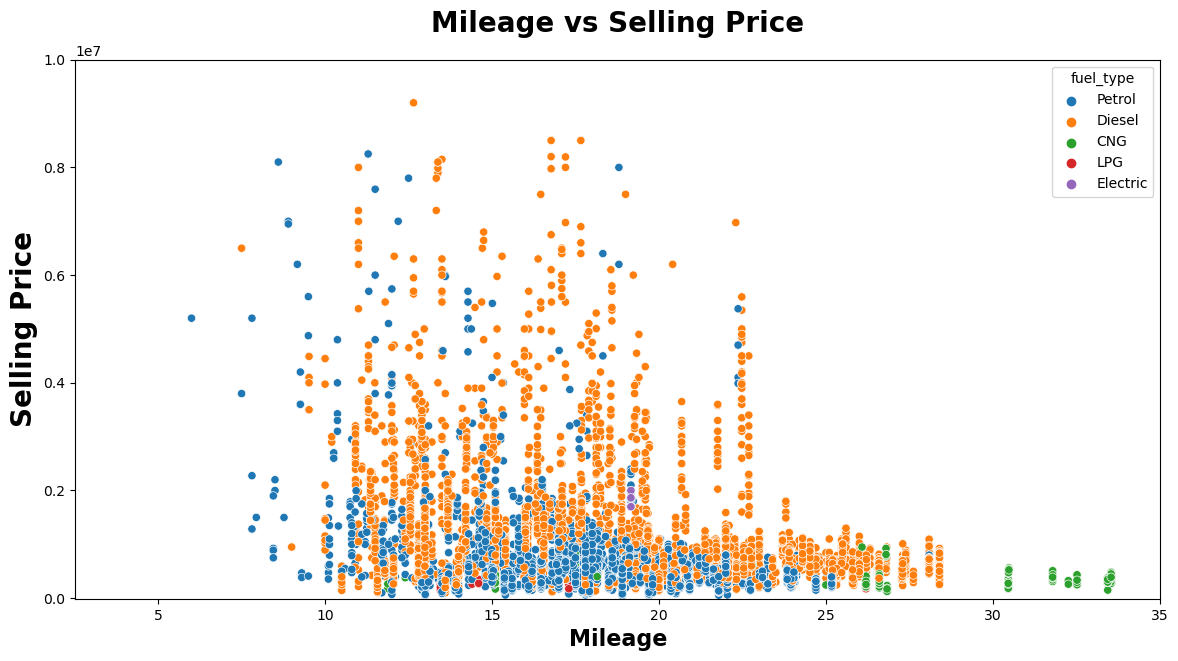

In [101]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="mileage", y='selling_price', data=df,color='b', hue='fuel_type')
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.ylim(-10000,10000000)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()

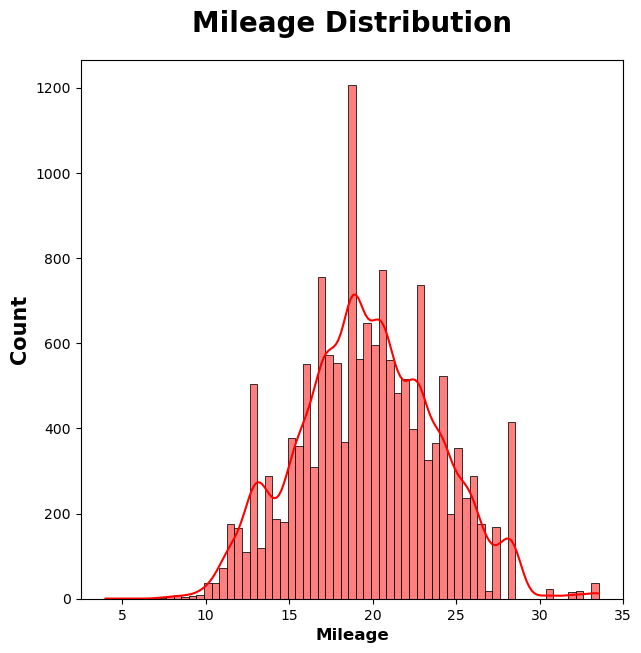

In [103]:
plt.subplots(figsize=(7,7))
sns.histplot(x=df.mileage, ec = "black", color='r', kde=True)
plt.title("Mileage Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Mileage", weight="bold", fontsize=12)
plt.show()

#### Vehicle age vs Selling Price

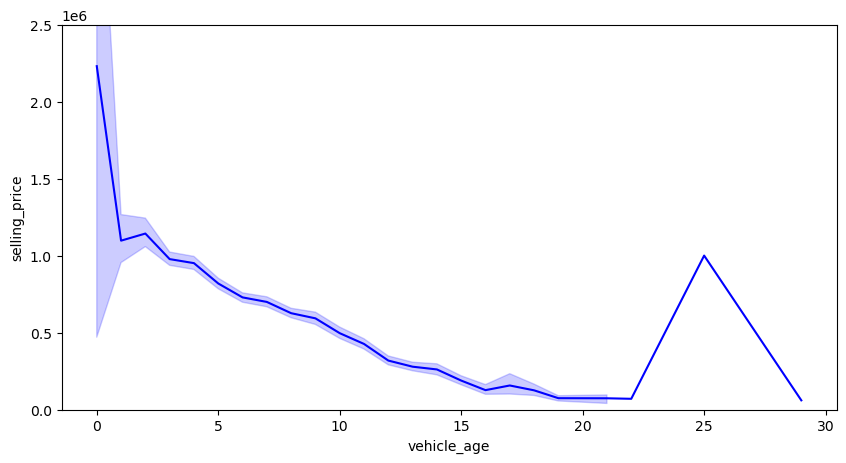

In [105]:
plt.subplots(figsize=(10,5))
sns.lineplot(x='vehicle_age',y='selling_price',data=df,color='b')
plt.ylim(0,2500000)
plt.show()

### Report
##### As the Vehicle age increases the price also get reduced.
##### Vehicle age has Negative impact on selling price

### Vehicle age vs Mileage

In [107]:
vehicle_age = df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head(5)

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51


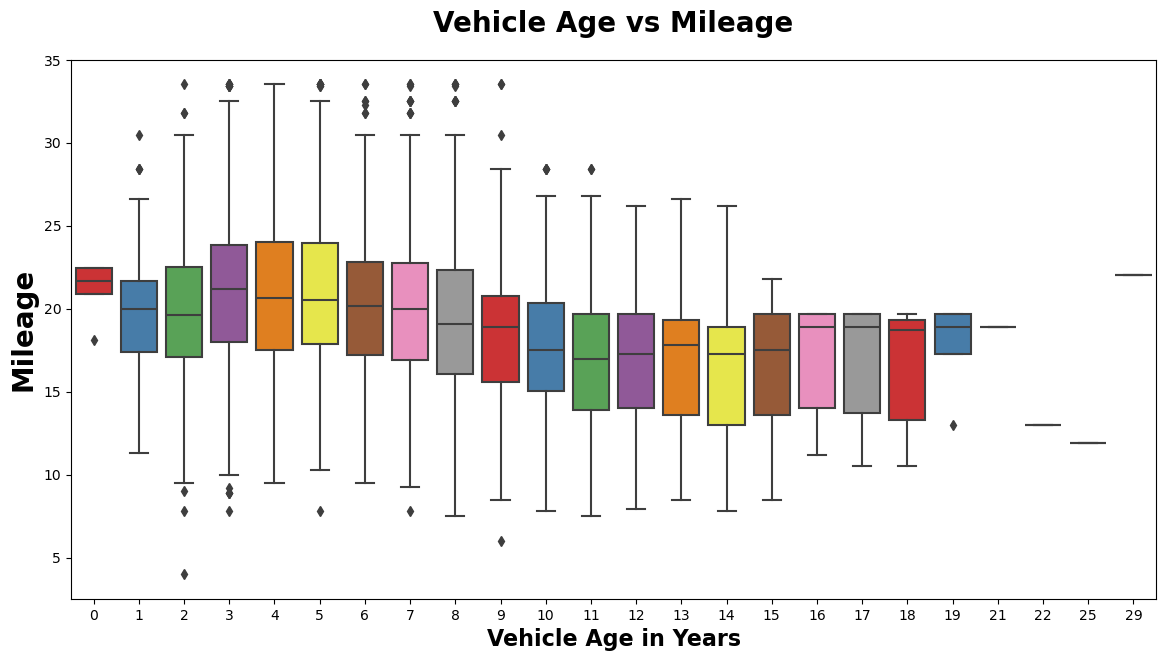

In [108]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=df.vehicle_age, y= df.mileage, palette="Set1")
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

### Report
##### As the Age of vehicle increases the median of mileage drops.
##### Newer Vehicles have more mileage median older vehicle.

In [110]:
oldest = df.groupby('car_name')['vehicle_age'].max().sort_values(ascending=False).head(10)
oldest.to_frame()

,vehicle_age
car_name,
Maruti Alto,29
BMW 3,25
Honda City,22
Maruti Wagon R,21
Mahindra Bolero,18
Mahindra Scorpio,18
Skoda Octavia,18
Honda CR-V,17
Mercedes-Benz E-Class,17


### Report
##### Maruti Alto is the Oldest car available 29 years old in the used car website followed by BMW 3 for 25 years old.

### Transmission Type

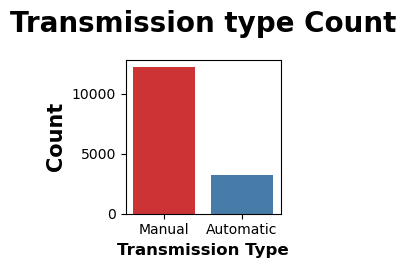

In [116]:
plt.subplots(figsize=(2,2))
sns.countplot(x='transmission_type', data=df,palette="Set1")
plt.title("Transmission type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

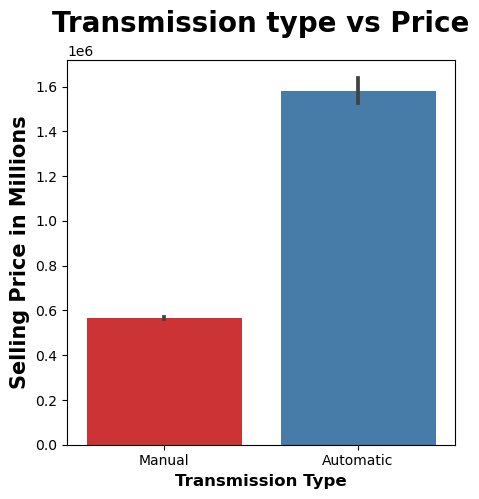

In [118]:
plt.subplots(figsize=(5,5))
sns.barplot(x='transmission_type', y='selling_price', data=df,palette="Set1")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

### Report
##### Manual Transmission was found in most of the cars which was sold.
##### Automatic cars have more selling price than manual cars

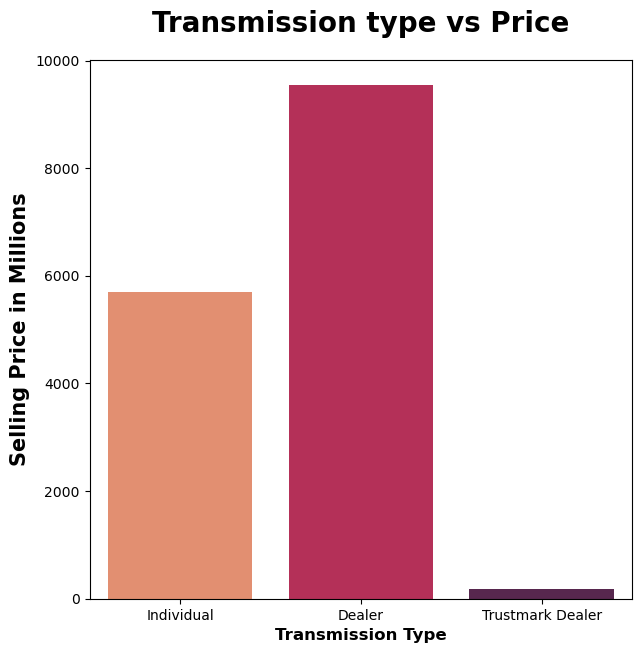

In [120]:
plt.subplots(figsize=(7,7))
sns.countplot(x='seller_type', data=df,palette="rocket_r")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

In [121]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


###Report
##### Dealers have put more ads on used car website.
##### Dealers have put 9539 ads with median selling price of 5.91 Lakhs.
##### Followed by Individual with 5699 ads with median selling price of 5.4 Lakhs.
##### Dealers have more median selling price than Individual.

### Final Report
##### The datatypes and Column names were right and there was 15411 rows and 13 columns
##### The selling_price column is the target to predict. i.e Regression Problem.
##### There are outliers in the km_driven, enginer, selling_price, and max power.
##### Dealers are the highest sellers of the used cars.
##### Skewness is found in few of the columns will check it after handling outliers.
##### Vehicle age has negative impact on the price.
##### Manual cars are mostly sold and automatic has higher selling average than manual cars.
##### Petrol is the most preffered choice of fuel in used car website, followed by diesel and LPG.
##### We just need less data cleaning for this dataset.